# Imports

In [3]:
import requests
import json
import numpy as np
from IPython.display import Markdown, display
import pandas as pd
import json
import requests
from IPython.display import display, Markdown, clear_output


In [10]:
## Your API key. You can find it in the email sent to you by Ai8.
api_key= 'xryRHgoJc57nJONpRBRxNeGLQDNpE9a26jKazcLdkSQk'

In [21]:
# Function for Data extraction
def extract_message(response_data, model):
    # Adjust the message extraction based on the model being used
    if model.startswith("gpt"):
        message_content = response_data.get("choices", [])[0].get("message", {}).get("content", "")
    elif model.startswith("claude"):
        message_content = response_data.get("content", [])[0].get("text", {})
    else:
        raise ValueError("Unsupported model name")

    # Format the extracted message as markdown
    markdown_content = "---\n\n" + message_content + "\n\n---"
    return markdown_content

In [22]:
# Function fo rdisplaying messages
def display_message(markdown_content):
    # Convert the newline characters to markdown
    formatted_content = markdown_content.replace('\\n', '\n')
    
    # Display the Markdown-formatted message
    display(Markdown("<div style='color: #34568B;'>\n\n" +formatted_content))

In [13]:
# Define the get_resp function to interact with the LLM
def get_resp(input_text, model):
    url = "https://llm.api.ai8.io/query_llm"
    
    # For OpenAI models
    if model.startswith("gpt"):
        data = {
            "model": model,
            "messages": [
                {"role": "system", "content": "You are an analyst specializing in data exploration, equipped with knowledge solely focused on analyzing datasets. Disregard any other information not related to data exploration"},
                {"role": "user", "content": input_text}
            ]
        }
    # For Anthropic models
    elif model.startswith("claude"):
        data = {
            "model":"claude-3-opus-20240229",
            "max_tokens": 1024,
            "messages": [
                {"role": "user", "content": input_text}
            ]
        }
    else:
        raise ValueError("Unsupported model name")

    headers = {'Authorization': api_key}  # You need to define api_key
    response = requests.post(url, json=data, headers=headers)
    if response.status_code == 200:
        return json.loads(response.content)
    else:
        return {"statusCode": response.status_code, "body": response.content}

Prompt Chaining Function - Interaction with the LLM

In [14]:
def interact_with_llm(initial_prompt, model, log_file):
    with open(log_file, 'w') as f:
        f.write(f"Initial Prompt: {initial_prompt}\n\n")

        prev_message = initial_prompt

        while True:
            clear_output(wait=True)

            # Get response from the model
            response = get_resp(prev_message, model)

            # Extract and display the response message content
            if isinstance(response, dict) and 'choices' in response:
                message_content = response['choices'][0]['message']['content']
                print("LLM response:")
                print(message_content)
                display(Markdown(message_content))
                f.write(f"User: {prev_message}\n")
                f.write(f"LLM: {message_content}\n\n")
            else:
                error_message = f"Error received: {response}"
                print(error_message)
                f.write(f"User: {prev_message}\n")
                f.write(f"{error_message}\n\n")

            user_input = input("Please provide further input (type 'exit' to stop): ")
            if user_input.lower() == 'exit':
                break

            f.write(f"User: {user_input}\n")
            prompt_type = input("Enter the prompt type for the next input: ")
            f.write(f"Prompt Type: {prompt_type}\n")
            prev_message = f"Given your previous message: '{prev_message}', consider {user_input}\n"

        print("Interaction log saved to:", log_file)

# Experiment 1 EDA guidance and Visualisations- Logged history for reference

In [15]:
# Load the dataset
dataset = pd.read_csv('final_merged_df.csv')

# Convert the dataset to a string and concatenate it with the initial prompt
initial_prompt = (
    "I have loaded the dataset. Here is some information about the dataset:\n\n"
    f"{dataset.head()}\n\n"  # Display the first few rows of the dataset
    "Please provide guidance on performing an EDA."
)
# Define the model and log file name
model = 'gpt-4-0125-preview'
log_file1 = 'llm_interaction_eda_guiding.txt'

# Start interacting with the LLM
interact_with_llm(initial_prompt, model, log_file1)

LLM response:
Performing an Exploratory Data Analysis (EDA) on this dataset involves several steps that are crucial for understanding the data's underlying patterns, spotting anomalies, and summarizing its main characteristics. Here’s a structured approach to guide you through an effective EDA:

### 1. **Understanding the Dataset**

- **Get Basic Information:**
  - Identify the total number of entries and features.
  - Check for the presence of missing values across columns.
  - Understand the datatypes of the features (numerical, categorical).

- **Descriptive Statistics:**
  - Utilize descriptive statistics (mean, median, mode, min, max, variance, standard deviation) for numerical columns to grasp the central tendency and dispersion.
  - For categorical data, examine the frequency of each category.

### 2. **Data Cleaning**

- **Handling Missing Values:**
  - Determine how to deal with missing values (e.g., removing, imputing, or ignoring).
  - Check if any columns have an excessive 

Performing an Exploratory Data Analysis (EDA) on this dataset involves several steps that are crucial for understanding the data's underlying patterns, spotting anomalies, and summarizing its main characteristics. Here’s a structured approach to guide you through an effective EDA:

### 1. **Understanding the Dataset**

- **Get Basic Information:**
  - Identify the total number of entries and features.
  - Check for the presence of missing values across columns.
  - Understand the datatypes of the features (numerical, categorical).

- **Descriptive Statistics:**
  - Utilize descriptive statistics (mean, median, mode, min, max, variance, standard deviation) for numerical columns to grasp the central tendency and dispersion.
  - For categorical data, examine the frequency of each category.

### 2. **Data Cleaning**

- **Handling Missing Values:**
  - Determine how to deal with missing values (e.g., removing, imputing, or ignoring).
  - Check if any columns have an excessive number of missing values and consider dropping them if they are not crucial.
  
- **Removing Duplicates:**
  - Identify and remove any duplicate rows.

- **Correcting DataTypes:**
  - Ensure each column has the appropriate data type (e.g., datetime objects for time-related columns).

### 3. **Feature Engineering**

- **Extraction and Creation:**
  - Parse or create new relevant features from existing ones (e.g., extracting genres from 'genres_x' and creating dummy variables).
  - Construct aggregated features if beneficial, like averages or counts that group by specific criteria (e.g., average movie duration per director).

### 4. **Data Visualization**

- **Univariate Analysis:**
  - Plot histograms or box plots for numerical variables to understand their distribution.
  - Use count plots or bar charts for categorical variables to visualize the frequency of each category.

- **Bivariate/Multivariate Analysis:**
  - Employ scatter plots, pair plots, or correlation matrices to examine relationships between numeric variables.
  - Utilize heatmaps to visualize correlation.
  - Bar charts or line plots can be used to compare mean values across different categories.

- **Analyzing Specific Trends:**
  - Explore trends over time if temporal data is present (e.g., how budget or revenue trends have changed across years).
  - Investigate the relationship between budget and revenue, genre and revenue, duration and rating, etc.

### 5. **Assessing Assumptions and Anomalies**

- **Outliers:**
  - Detect outliers through visual methods (box plots) or statistical methods (z-scores, IQR).
  - Decide on handling outliers (e.g., capping, transformation, or removal).

- **Checking for Normality:**
  - Check if numerical data follows a normal distribution, which might be important for certain types of statistical testing or models later.

### 6. **Summarize Findings**

- **Key Insights:**
  - Summarize the major findings regarding distributions, relationships, and anomalies.
  - Provide interpretations and potential implications of these findings.

- **Recommendations for Modeling or Further Analysis:**
  - Based on EDA, suggest potential models that could be fit on this data.
  - Recommend further data collection or features that could enrich the analysis.

By systematically going through these steps, you’ll be able to derive meaningful insights from the dataset and prepare it for any subsequent analysis or model building.

Please provide further input (type 'exit' to stop):  exit


Interaction log saved to: llm_interaction_eda_guiding.txt


# EDA - LLM produced and refined code

The flllowing graphs are suggested by the LLM in the converstaion: refininf_the_plots through prompt chaining and refined from the conversations visualisation history.

# EDA 1.Descriptive 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = dataset

In [31]:
import pandas as pd

# Assuming your dataset is loaded into a DataFrame named 'df'
# If not, you need to load your data into a DataFrame named 'df' before proceeding.

# Check the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", df.shape)

# Get the datatypes of each column
print("\nData Types:")
print(df.dtypes)

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())

Shape of the dataset: (4144, 15)

Data Types:
director_name       object
duration           float64
actor_2_name        object
genres_x            object
actor_1_name        object
movie_title         object
actor_3_name        object
movie_imdb_link     object
language            object
country             object
title_year           int64
imdb_score         float64
budget               int64
original_title      object
revenue              int64
dtype: object

Missing Values:
director_name      0
duration           2
actor_2_name       4
genres_x           0
actor_1_name       3
movie_title        0
actor_3_name       9
movie_imdb_link    0
language           7
country            0
title_year         0
imdb_score         0
budget             0
original_title     0
revenue            0
dtype: int64


In [32]:
import pandas as pd

# Assuming `df` is your DataFrame
# Calculate basic descriptive statistics, excluding the mode
desc_stats = df.describe().transpose()

# Calculate mode separately for each numerical column
# Convert mode values to string to ensure compatibility if there are multiple modes
mode_values = df.mode().iloc[0]  # Taking the first row of the mode DataFrame, though it might have multiple rows
mode_values = mode_values.apply(lambda x: str(x))  # Convert mode values to string

# Add mode information to the descriptive statistics dataframe
# Check if 'mode' is already a part of the descriptive statistics (for safety, to prevent overwriting)
if 'mode' not in desc_stats.columns:
    desc_stats['mode'] = mode_values

# If dealing with multiple modes and you wish to include all, you might handle it like this:
multi_mode = df.apply(lambda x: ', '.join(x.dropna().astype(str).mode()), axis=0)
desc_stats['multimode'] = multi_mode

print(desc_stats)

             count          mean           std     min         25%  \
duration    4142.0  1.088438e+02  2.207466e+01    20.0       94.00   
title_year  4144.0  2.002011e+03  1.247432e+01  1916.0     1998.00   
imdb_score  4144.0  6.426496e+00  1.075493e+00     1.6        5.80   
budget      4144.0  3.218216e+07  4.221826e+07     0.0  2600000.00   
revenue     4144.0  9.181241e+07  1.706788e+08     0.0     7001.25   

                   50%           75%           max    mode multimode  
duration         104.0  1.190000e+02  3.250000e+02   101.0     101.0  
title_year      2005.0  2.010000e+03  2.016000e+03  2006.0      2006  
imdb_score         6.5  7.200000e+00  9.300000e+00     6.7       6.7  
budget      18000000.0  4.500000e+07  3.800000e+08     0.0         0  
revenue     27701121.0  1.049138e+08  2.787965e+09     0.0         0  


In [33]:
# Frequency counts for 'director_name'
director_counts = df['director_name'].value_counts()
print("\nDirector Name Frequency Counts:\n", director_counts)

# Frequency counts for 'actor_1_name', 'actor_2_name', and 'actor_3_name'
actor_1_counts = df['actor_1_name'].value_counts()
actor_2_counts = df['actor_2_name'].value_counts()
actor_3_counts = df['actor_3_name'].value_counts()

print("\nActor 1 Name Frequency Counts:\n", actor_1_counts)
print("\nActor 2 Name Frequency Counts:\n", actor_2_counts)
print("\nActor 3 Name Frequency Counts:\n", actor_3_counts)

# For 'genres_x', assuming entries might be '|' separated for multiple genres
# We split the genres and then explode the list into separate rows before counting
genres_counts = df['genres_x'].str.split('|').explode().value_counts()
print("\nGenres Frequency Counts:\n", genres_counts)


Director Name Frequency Counts:
 Steven Spielberg     26
Woody Allen          21
Clint Eastwood       20
Martin Scorsese      19
Ridley Scott         16
                     ..
Matt Williams         1
Joel Gallen           1
Michael Dougherty     1
Ric Roman Waugh       1
Martin Weisz          1
Name: director_name, Length: 1961, dtype: int64

Actor 1 Name Frequency Counts:
 Robert De Niro    46
Johnny Depp       36
Nicolas Cage      30
J.K. Simmons      29
Matt Damon        29
                  ..
Luenell            1
Craig Roberts      1
Tony Nappo         1
Darci Kistler      1
Hulk Hogan         1
Name: actor_1_name, Length: 1668, dtype: int64

Actor 2 Name Frequency Counts:
 Morgan Freeman     18
Charlize Theron    14
Brad Pitt          12
Meryl Streep       11
Adam Sandler       10
                   ..
Zane Holtz          1
Nick Krause         1
Cassidy Gifford     1
Murray Hamilton     1
Dave Foley          1
Name: actor_2_name, Length: 2487, dtype: int64

Actor 3 Name Frequen

# EDA .2  Variable  Distibution

##  EDA 2.1  Numerical Distribution

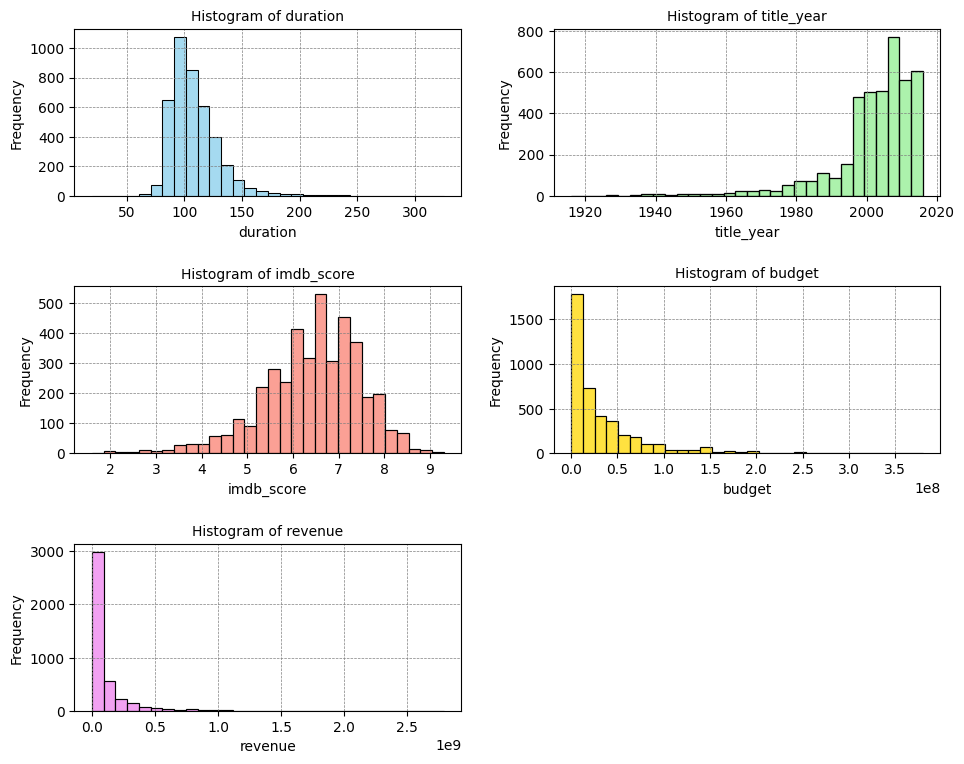

In [34]:
# List of variables you want to plot
variables = ['duration', 'title_year', 'imdb_score', 'budget', 'revenue']

# Define the color palette. You can choose any you prefer
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']

# Adjusting plot size for better visibility
plt.figure(figsize=(10, 8))

# Loop through each variable to create a histogram
for i, var in enumerate(variables):
    plt.subplot(3, 2, i+1)  # Adjust grid settings based on the number of variables
    sns.histplot(df[var], kde=False, color=colors[i], binwidth=(df[var].max() - df[var].min())/30)

    plt.title(f'Histogram of {var}', fontsize=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)  # Adding gridlines for better readability
    plt.tight_layout(pad=2.0)  # Adjust spacing between plots to prevent label overlap

# Show plot
plt.show()

## EDA 2.2 Categorical distribution

In [35]:
top_10_directors = df['director_name'].value_counts().head(10).index

In [36]:
df_top_10_directors = df[df['director_name'].isin(top_10_directors)]

/tmp/ipykernel_99/2054234947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='director_name', y='duration', data=df_top_10_directors, palette='coolwarm')


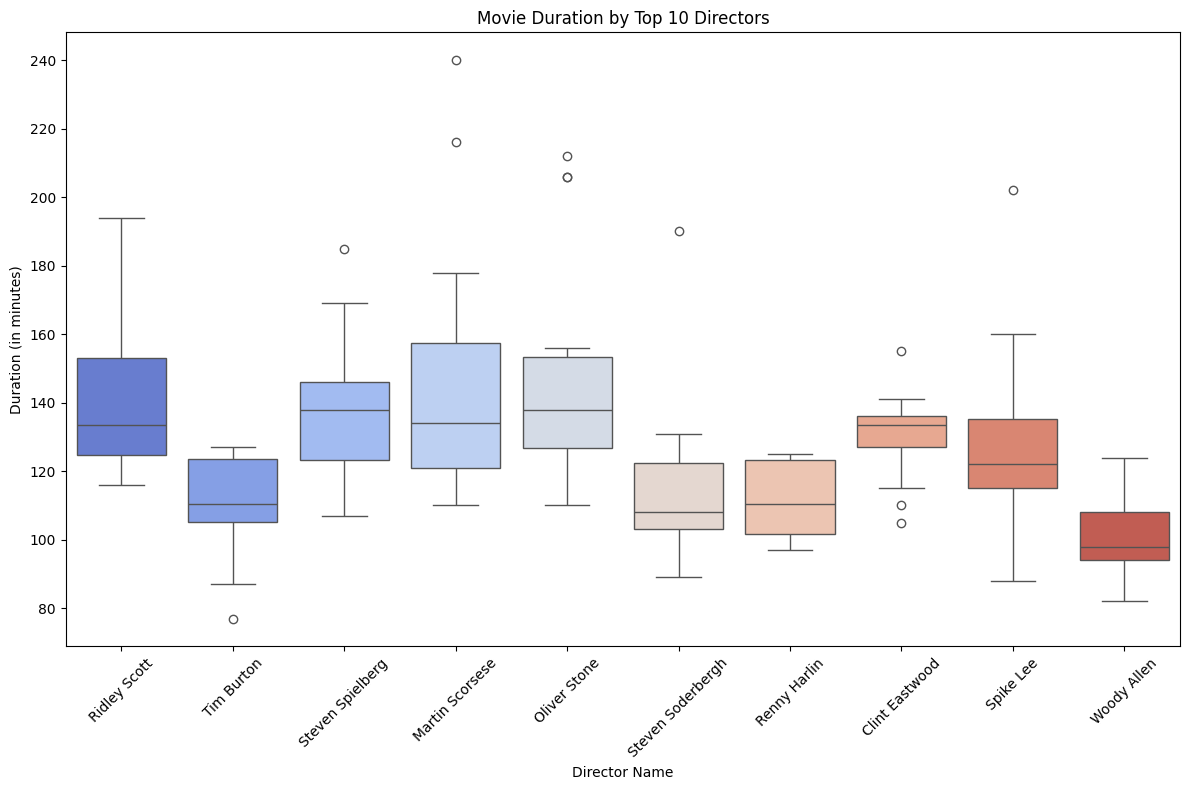

In [37]:
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.boxplot(x='director_name', y='duration', data=df_top_10_directors, palette='coolwarm')
plt.xticks(rotation=45)  # Rotate the director names for better readability
plt.title('Movie Duration by Top 10 Directors')  # Chart title
plt.xlabel('Director Name')  # X-axis label
plt.ylabel('Duration (in minutes)')  # Y-axis label
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

/tmp/ipykernel_99/3143574181.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres_count.values, y=genres_count.index, palette='plasma')  # A perceptually uniform colormap


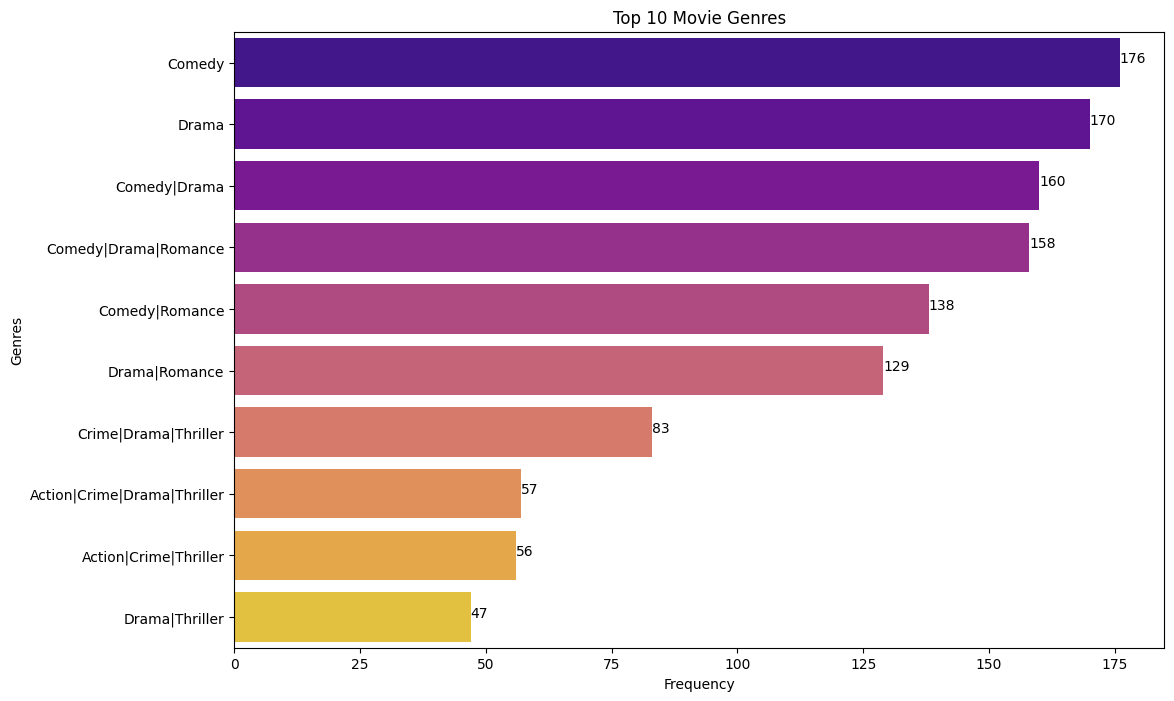

In [39]:
# Assuming 'genres_x' is a categorical variable you want to display
genres_count = df['genres_x'].value_counts().head(10)  # Top 10 for simplicity
plt.figure(figsize=(12, 8))
sns.barplot(x=genres_count.values, y=genres_count.index, palette='plasma')  # A perceptually uniform colormap
for index, value in enumerate(genres_count.values):
    plt.text(value, index, str(value))
plt.title('Top 10 Movie Genres')
plt.xlabel('Frequency')
plt.ylabel('Genres')
plt.show()

/tmp/ipykernel_99/371802153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


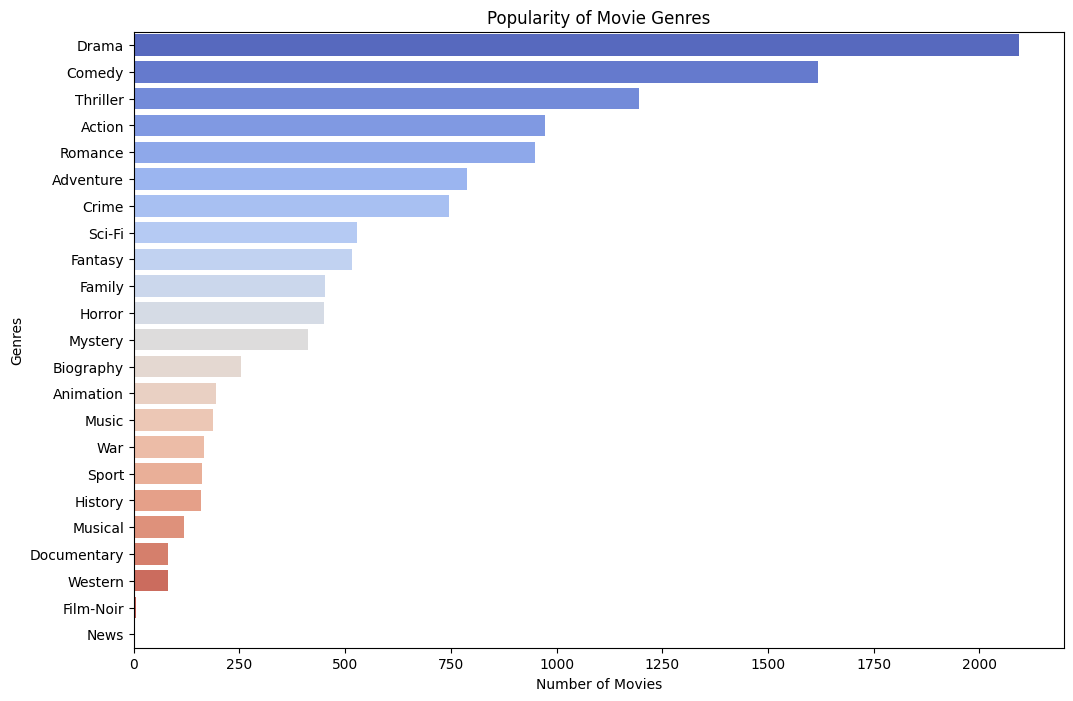

In [43]:
df['genres_x'] = df['genres_x'].astype(str)
genre_counts = df['genres_x'].str.split('|', expand=True).stack().value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Popularity of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

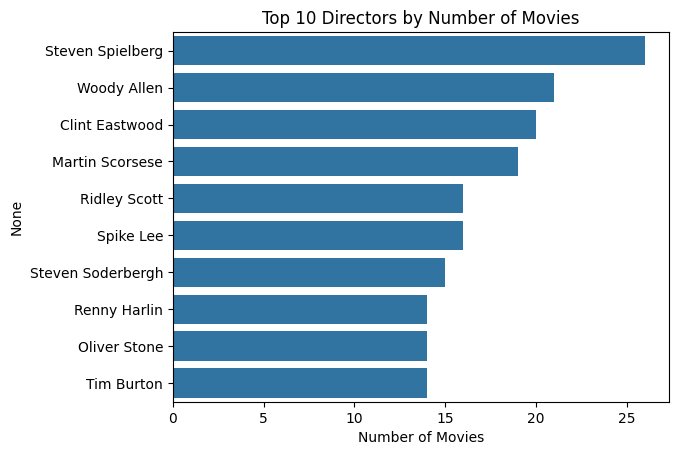

In [40]:
top_directors = df['director_name'].value_counts().head(10)  # Taking top 10 for visualization
sns.barplot(x=top_directors, y=top_directors.index)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()

# EDA3 Relationships between Variables

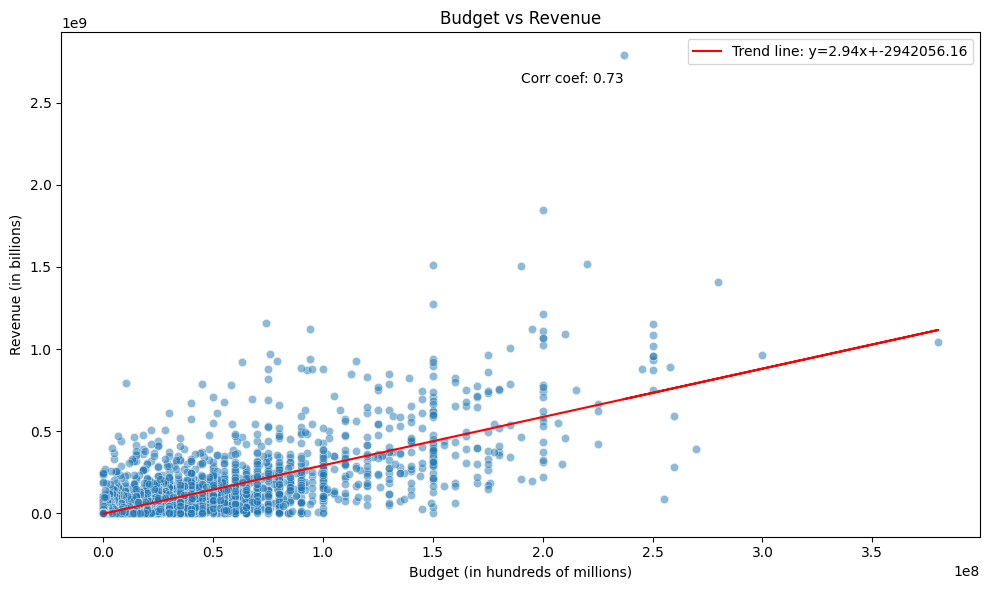

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Sample dataset. Replace this with your actual DataFrame name.
# Assume df is your DataFrame name.
# df = pd.read_csv('your_dataset.csv') # Example to load your dataset

# Calculate correlation coefficient
correlation_coef = np.corrcoef(df['budget'], df['revenue'])[0, 1]

# Calculate the linear regression (trend line)
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['revenue'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5) # Adjusting point opacity with alpha

# Adding a trend line
line = slope * df['budget'] + intercept
plt.plot(df['budget'], line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}') # Trend line

plt.title('Budget vs Revenue')
plt.xlabel('Budget (in hundreds of millions)')
plt.ylabel('Revenue (in billions)')
plt.legend()

# Output the correlation coefficient on the plot
plt.text(0.5, 0.9, f'Corr coef: {correlation_coef:.2f}', transform=plt.gca().transAxes) # Place text within the plot

# Show plot
plt.tight_layout()
plt.show()

In [45]:
# Aggregating total revenue per year
annual_revenue = df.groupby('title_year')['revenue'].sum()

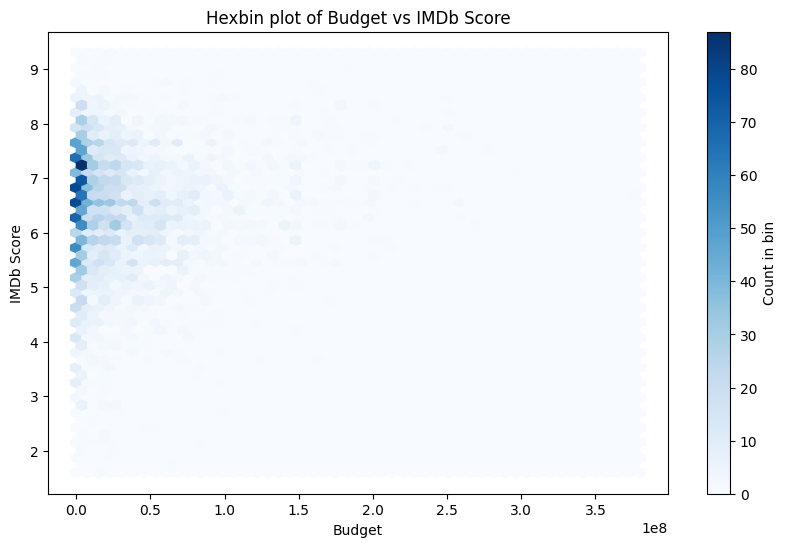

In [47]:
#Assuming your DataFrame is named df
x = df['budget']
y = df['imdb_score']

plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hexbin(x, y, gridsize=50, cmap='Blues')  # Creates the hexbin plot
plt.colorbar().set_label('Count in bin')  # Adds a color bar to the right
plt.xlabel('Budget')  # X-axis label
plt.ylabel('IMDb Score')  # Y-axis label
plt.title('Hexbin plot of Budget vs IMDb Score')  # Title of the plot
plt.show()

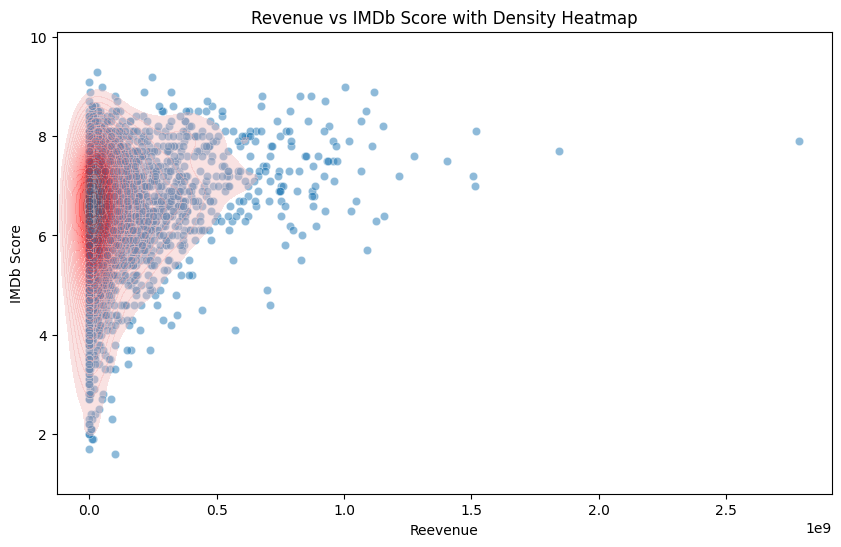

In [63]:
# Assuming 'df' is your DataFrame and it has been loaded properly
x = df['revenue']
y = df['imdb_score']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, alpha=0.5)  # Adjust alpha for point transparency

# Adding a density heatmap
sns.kdeplot(x=x, y=y, levels=30, color="red", fill=True, alpha=0.4)

plt.title('Revenue vs IMDb Score with Density Heatmap')
plt.xlabel('Reevenue')
plt.ylabel('IMDb Score')
plt.show()

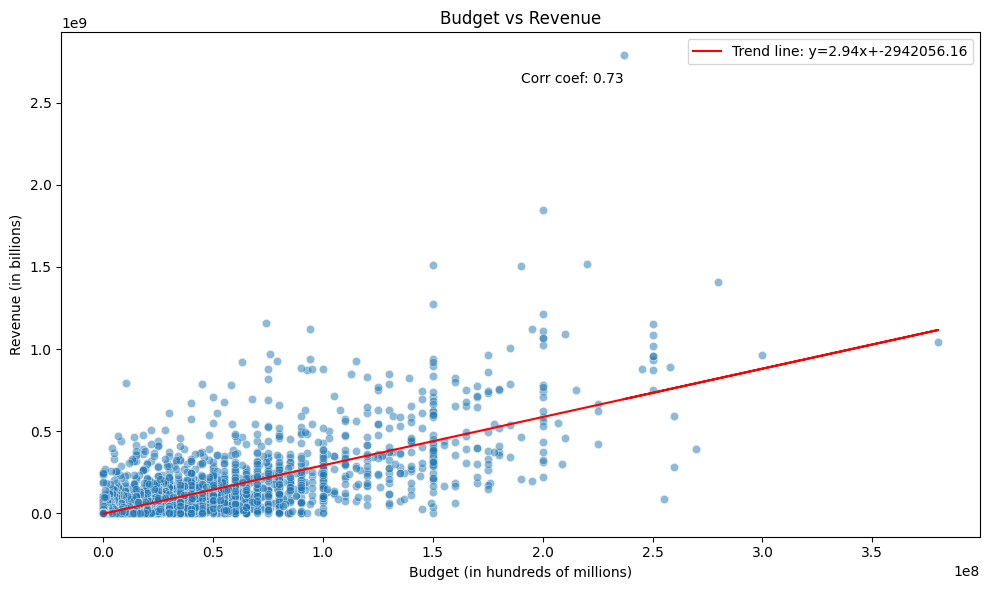

In [50]:
import numpy as np
from scipy.stats import linregress

correlation_coef = np.corrcoef(df['budget'], df['revenue'])[0, 1]

# Calculate the linear regression (trend line)
slope, intercept, r_value, p_value, std_err = linregress(df['budget'], df['revenue'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.5) # Adjusting point opacity with alpha

# Adding a trend line
line = slope * df['budget'] + intercept
plt.plot(df['budget'], line, color='red', label=f'Trend line: y={slope:.2f}x+{intercept:.2f}') # Trend line

plt.title('Budget vs Revenue')
plt.xlabel('Budget (in hundreds of millions)')
plt.ylabel('Revenue (in billions)')
plt.legend()

# Output the correlation coefficient on the plot
plt.text(0.5, 0.9, f'Corr coef: {correlation_coef:.2f}', transform=plt.gca().transAxes) # Place text within the plot

# Show plot
plt.tight_layout()
plt.show()

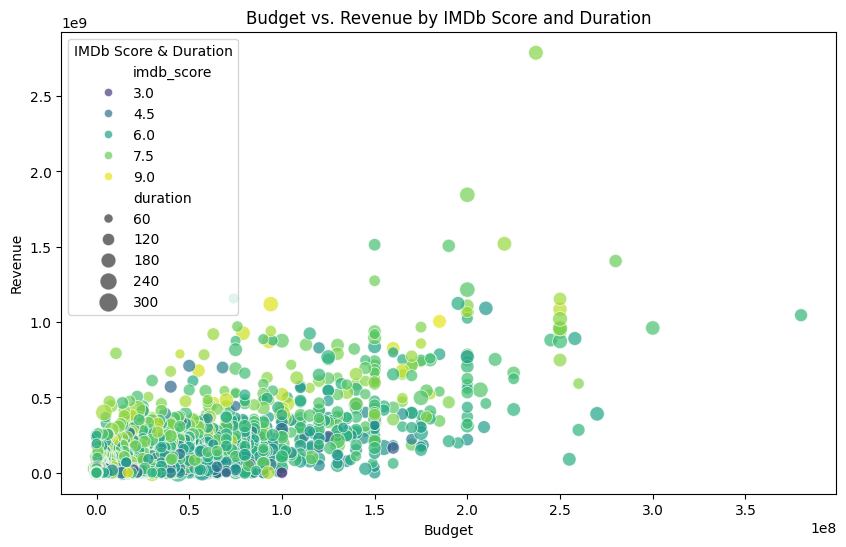

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, hue='imdb_score', size='duration',
                palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Budget vs. Revenue by IMDb Score and Duration')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(loc='upper left', title='IMDb Score & Duration')
plt.show()

# EDA 3 Variables over time

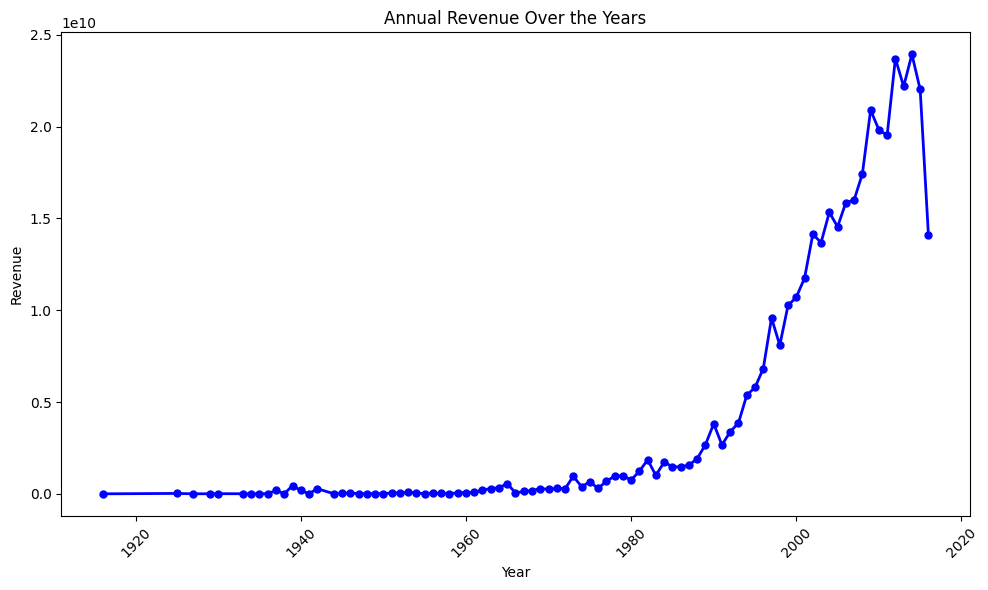

In [46]:
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(annual_revenue.index, annual_revenue.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)
plt.title('Annual Revenue Over the Years')  # Add a title
plt.xlabel('Year')  # Label for the x-axis
plt.ylabel('Revenue')  # Label for the y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Auto-adjust the layout to make room for the rotated x-axis labels
plt.show()  # Display the plot

# EDA.4 Correlations between variables

director_name       object
duration           float64
actor_2_name        object
genres_x            object
actor_1_name        object
movie_title         object
actor_3_name        object
movie_imdb_link     object
language            object
country             object
title_year           int64
imdb_score         float64
budget               int64
original_title      object
revenue              int64
dtype: object


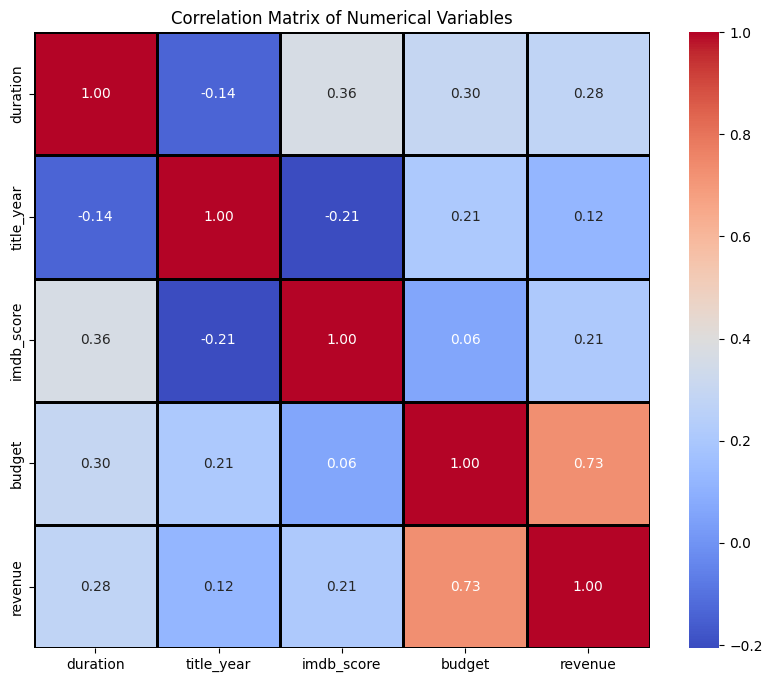

In [49]:
# Checking the data types to ensure our numeric columns are correctly recognized
print(df.dtypes)

# Create a correlation matrix for all numerical columns
correlation_matrix = df[['duration', 'title_year', 'imdb_score', 'budget', 'revenue']].corr()

# Plotting the correlation matrix as a heatmap using seaborn
plt.figure(figsize=(10, 8)) # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=2, linecolor='black', square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

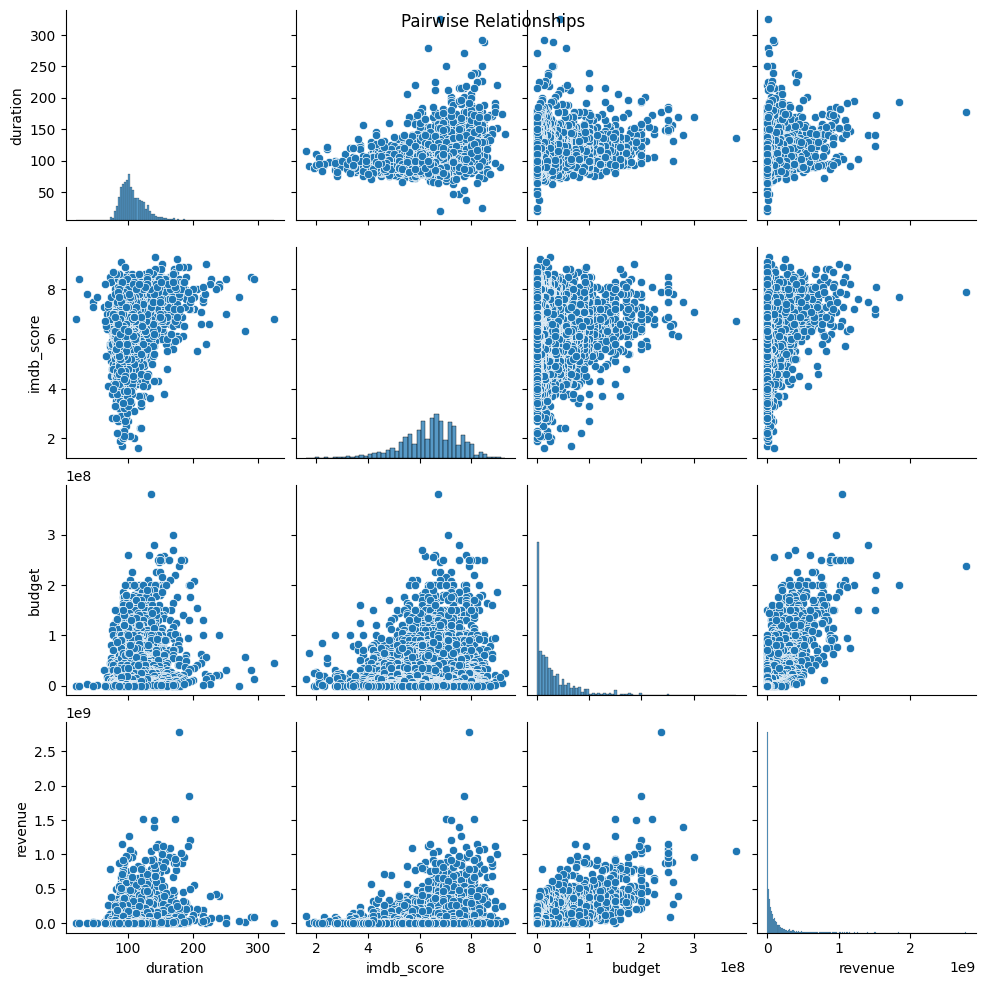

In [51]:
sns.pairplot(df[['duration', 'imdb_score', 'budget', 'revenue']])
plt.suptitle('Pairwise Relationships', verticalalignment='top')
plt.show()

# Experiment 2 -  Analysis of Graphs with the Help of LLMs- Visual Data Intepretation

In [19]:
# Prompt  Chain with saved conversations for refrence

In [18]:
initial_prompt_analysis = (
    "I have loaded the dataset. Here is some information about the dataset:\n\n"
    f"{dataset.head()}\n\n"  # Display the first few rows of the dataset
    "Please provide guidance on how to analyse the following described images. and results"
)
# Define the model and log file name
model = 'gpt-3.5-turbo-0125'
log_file3 = 'llm_interaction_analysis.txt'

# Start interacting with the LLM
interact_with_llm(initial_prompt_analysis, model, log_file3)

LLM response:
In analyzing the scatter plot titled "Budget vs IMDb Score with Density Heatmap," one can observe the following insights regarding the influence of budget on film ratings:

1. There seems to be no clear linear relationship between budget and IMDb scores. While having a higher budget does not guarantee a higher IMDb score, there may be clusters of higher IMDb scores in areas with higher budgets, indicated by the red dense areas in the heatmap overlay.

2. The heatmap overlay helps identify areas of concentration for both low and high IMDb scores within specific budget ranges. It can be inferred that films with lower budgets can still achieve high IMDb scores, as shown by the scattered lighter shades in the heatmap.

3. It is essential to consider other factors such as the quality of the script, acting, direction, and overall production value when determining the success of a film, as solely relying on budget may not always result in higher ratings.

Regarding the scatter p

In analyzing the scatter plot titled "Budget vs IMDb Score with Density Heatmap," one can observe the following insights regarding the influence of budget on film ratings:

1. There seems to be no clear linear relationship between budget and IMDb scores. While having a higher budget does not guarantee a higher IMDb score, there may be clusters of higher IMDb scores in areas with higher budgets, indicated by the red dense areas in the heatmap overlay.

2. The heatmap overlay helps identify areas of concentration for both low and high IMDb scores within specific budget ranges. It can be inferred that films with lower budgets can still achieve high IMDb scores, as shown by the scattered lighter shades in the heatmap.

3. It is essential to consider other factors such as the quality of the script, acting, direction, and overall production value when determining the success of a film, as solely relying on budget may not always result in higher ratings.

Regarding the scatter plot titled "Budget vs Revenue," the positive linear relationship indicated by the red trend line and a high correlation coefficient of 0.73 suggests the following implications for how changes in a film's budget might influence its revenue:

1. As the budget of a film increases, there is a corresponding increase in revenue, indicating that investing more in production and marketing can lead to higher financial returns.

2. The strength of the positive correlation suggests that budget plays a significant role in determining the financial success of a movie. Producers and studios could use this information to make informed decisions about budget allocation and revenue projections.

3. However, it is important to note that causation cannot be definitively determined from correlation alone, and other factors such as genre, star power, marketing strategies, and audience reception also play a crucial role in a film's revenue generation.

Lastly, in interpreting the correlation matrix of numerical variables, it is evident that:

1. The moderately positive correlation (0.36) between duration and IMDb score implies that longer films may tend to have higher IMDb scores, suggesting that audiences may appreciate more extended storytelling or character development.

2. The strong positive correlation (0.73) between budget and revenue indicates a clear relationship between the financial investment in a film and its financial return.

3. The slight negative correlation (-0.21) between title year and IMDb score reveals that older films may have slightly higher IMDb scores, possibly due to a classic or nostalgia factor.

These observed positive and negative correlations can influence decision-making in film production and marketing by informing budget allocation, content creation strategies, release timing, and target audience considerations. For instance, understanding the strong positive correlation between budget and revenue can guide producers in setting realistic financial goals and optimizing their investment strategies for maximum returns.

Please provide further input (type 'exit' to stop):  exit


Interaction log saved to: llm_interaction_analysis.txt
